CNN输入矩阵，不用拉成向量

In [1]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

输入格式整理

In [5]:
x_train = x_train.reshape(60000,28,28,1) 
x_test = x_test.reshape(10000,28,28,1)

In [6]:
x_train[9487].shape

(28, 28, 1)

In [8]:
X = x_train[9487][:,:,0]

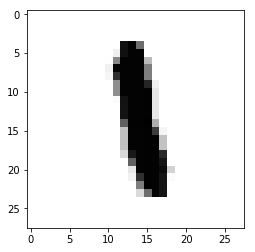

In [10]:
plt.imshow(X,cmap="Greys")

输出格式整理

In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

正式设计cnn


In [13]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

构建神经网络

In [14]:
model = Sequential()

In [16]:
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(28,28,1)))
model.add(Activation('relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

组装

In [25]:
model.compile(loss='mse',optimizer=SGD(lr=0.05),metrics=['accuracy'])

训练神经网络

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [28]:
(3*3+1)*32#每个filter有一个偏执b

320

训练

In [29]:
model.fit(x_train,y_train,batch_size=100,epochs=12)

Instructions for updating:
Use tf.cast instead.
Epoch 1/12
60000/60000 [==============================] - 53s 891us/step - loss: 0.0697 - acc: 0.6156
Epoch 2/12
60000/60000 [==============================] - 52s 867us/step - loss: 0.0057 - acc: 0.9632
Epoch 3/12
60000/60000 [==============================] - 49s 824us/step - loss: 0.0038 - acc: 0.9754
Epoch 4/12
60000/60000 [==============================] - 50s 832us/step - loss: 0.0029 - acc: 0.9816
Epoch 5/12
60000/60000 [==============================] - 45s 742us/step - loss: 0.0023 - acc: 0.9855
Epoch 6/12
60000/60000 [==============================] - 44s 740us/step - loss: 0.0020 - acc: 0.9881
Epoch 7/12
60000/60000 [==============================] - 44s 730us/step - loss: 0.0017 - acc: 0.9894
Epoch 8/12
60000/60000 [==============================] - 44s 731us/step - loss: 0.0015 - acc: 0.9911
Epoch 9/12
60000/60000 [==============================] - 44s 732us/step - loss: 0.0013 - acc: 0.9926
Epoch 10/12
60000/60000 [=========

结果测试

In [30]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 353us/step


In [31]:
print('loss:',score[0])

loss: 0.0023957441075866124


In [32]:
print('acc:',score[1])

acc: 0.9849


储存结果

In [34]:
model_json = model.to_json()
open('handwriting_model_cnn.json','w').write(model_json)
model.save_weights('handwriting_model_weights_cnn.h5')

In [35]:
predict = model.predict_classes(x_test)

In [36]:
pick = np.random.randint(1,9999,5)

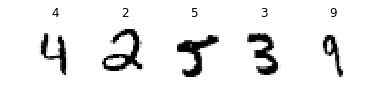

In [37]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")